In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
import itertools
import time
import statsmodels.formula.api as sm

train = pd.read_csv('ncaa_train.csv')
test = pd.read_csv('ncaa_test.csv')
train.head()

,Player,GP,GS,MIN,PTS,FGM,FGA,FGP,Three_Pmade,Three_PA,...,FTP,OFF,DEF,TRB,AST,STL,BLK,TOV,PF,NBA_PTS
0,Cade Cunningham,27,26,35.4,20.15,6.48,14.81,0.44,2.30,5.74,...,0.85,0.70,5.48,6.19,3.48,1.59,0.78,4.04,2.48,17.41
1,Jalen Suggs,30,30,28.9,14.37,5.17,10.27,0.50,1.17,3.47,...,0.76,0.60,4.73,5.33,4.53,1.90,0.33,2.93,2.60,11.75
2,Franz Wagner,28,26,31.8,12.46,4.43,9.29,0.48,1.25,3.64,...,0.84,0.71,5.82,6.54,3.00,1.25,1.04,1.29,2.21,15.15
3,Davion Mitchell,30,30,32.4,14.00,5.27,10.30,0.51,2.10,4.70,...,0.64,0.47,2.20,2.67,5.50,1.90,0.37,2.43,2.37,11.48
4,James Bouknight,15,14,31.6,18.73,6.53,14.60,0.45,1.47,5.00,...,0.78,1.53,4.13,5.67,1.80,1.13,0.27,2.80,1.87,4.58


In [101]:
train.corr()['NBA_PTS'].sort_values(ascending=False)

NBA_PTS        1.000000
GS             0.433931
FTP            0.351406
GP             0.337517
MIN            0.323561
STL            0.318212
FGM            0.270299
Three_Pmade    0.260686
PTS            0.249359
Three_PA       0.245180
DEF            0.228423
FGP            0.200565
FGA            0.191621
Three_PP       0.118538
BLK            0.104205
TRB            0.101691
PF             0.090852
TOV            0.073663
FTM            0.053743
AST           -0.007441
FTA           -0.015898
OFF           -0.241982
Name: NBA_PTS, dtype: float64

In [102]:
model1 = sm.ols(formula = 'NBA_PTS~GS', data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     6.727
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0147
Time:                        14:42:00   Log-Likelihood:                -85.405
No. Observations:                  31   AIC:                             174.8
Df Residuals:                      29   BIC:                             177.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5538      2.429      0.228      0.821      -4.414       5.521
GS             0.2521      0.097      2.594      0.015       0.053       0.451
==============================================================================
Omnibus:                        3.915   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.692
Skew:                           0.704   Prob(JB):                        0.260
Kurtosis:                       3.315   Cond. No.                         86.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='GS', ylabel='NBA_PTS'>

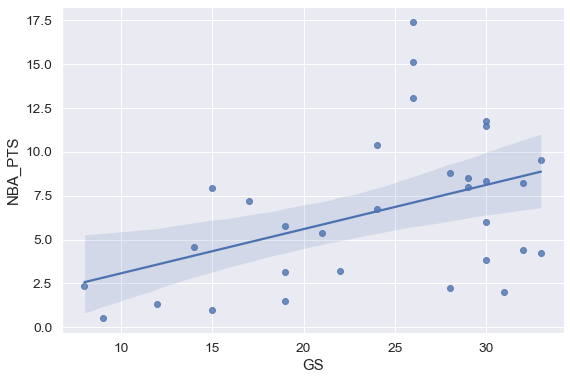

In [103]:
sns.regplot(x='GS',y='NBA_PTS', data=train)

In [129]:
preds1 = model1.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds1 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model1.mse_resid))

RMSE =  5.576177146620047 resid. standard error =  3.9329616080267082


Text(0, 0.5, 'Residuals')

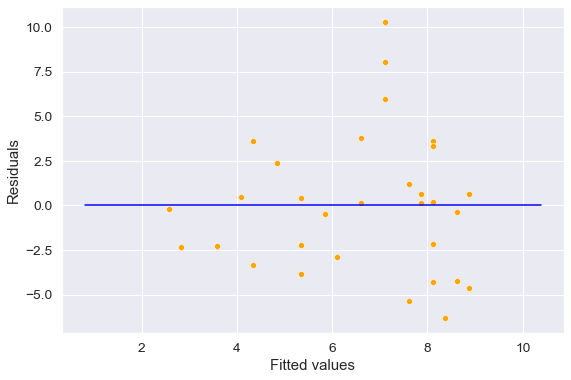

In [105]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model1.fittedvalues, y=model1.resid,color = 'orange')
sns.lineplot(x = [preds1.min(),preds1.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

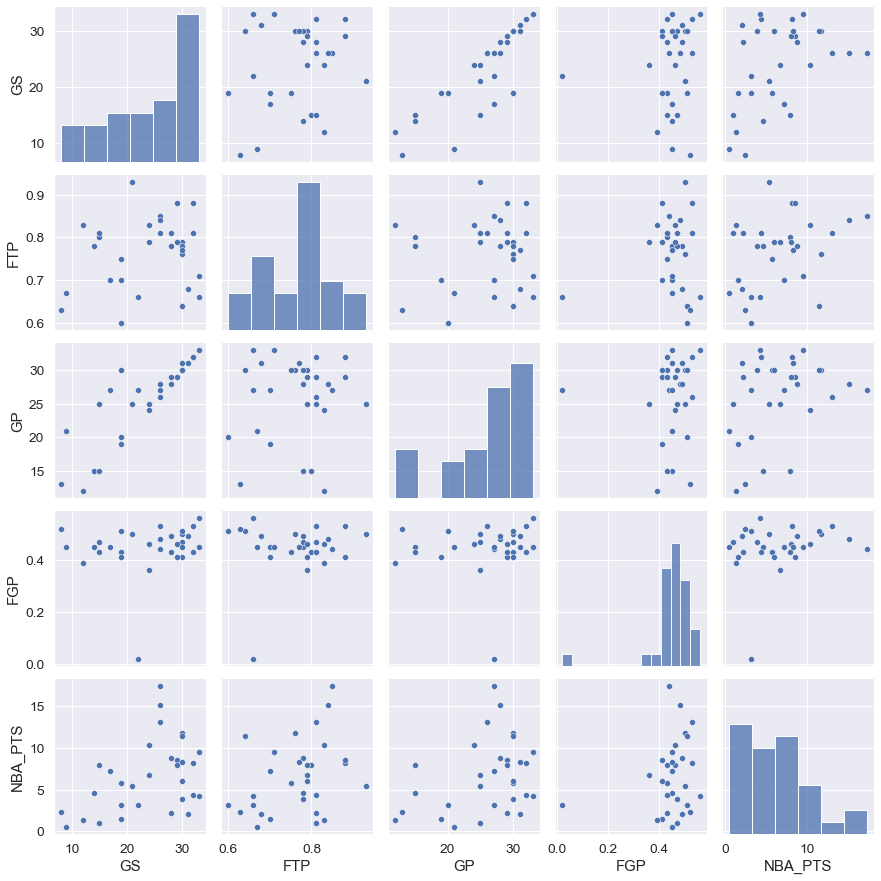

In [106]:
top4 = train[['GS','FTP','GP','FGP','NBA_PTS']]
sns.pairplot(top4)

In [107]:
model2 = sm.ols(formula = 'np.log(NBA_PTS)~GS+GP+FTP+FGP+I(GS**2)+I(GP**2)+I(FGP**2)', data=train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(NBA_PTS)   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     3.256
Date:                Fri, 03 Mar 2023   Prob (F-statistic):             0.0149
Time:                        14:42:12   Log-Likelihood:                -27.736
No. Observations:                  31   AIC:                             71.47
Df Residuals:                      23   BIC:                             82.94
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.2269      2.298     -0.969      0.343      -6.980       2.526
GS              0.4347      0.174      2.502      0.020       0.075       0.794
GP             -0.2512      0.256     -0.982      0.336      -0.781       0.278
FTP             1.6106      1.815      0.887      0.384      -2.144       5.365
FGP            -1.7620      4.972     -0.354      0.726     -12.047       8.523
I(GS ** 2)     -0.0086      0.004     -2.040      0.053      -0.017       0.000
I(GP ** 2)      0.0051      0.006      0.864      0.397      -0.007       0.017
I(FGP ** 2)     6.1480      7.994      0.769      0.450     -10.389      22.685
==============================================================================
Omnibus:                        2.965   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.201
Skew:                          -0.492   Prob(JB):                        0.333
Kurtosis:                       2.143   Cond. No.                     7.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
preds2 = model2.predict(test)
actuals = test[['NBA_PTS']]
actuals = actuals.iloc[:,0]
print('RMSE = ', np.sqrt(((preds2 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model2.mse_resid))

RMSE =  7.315852743977371 resid. standard error =  0.6872999485748477


Text(0, 0.5, 'Residuals')

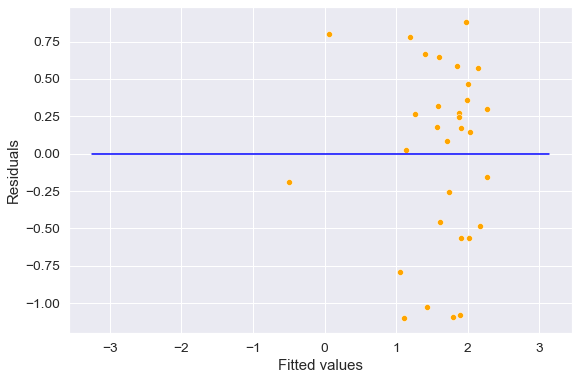

In [109]:
#Plotting residuals vs fitted values
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [preds2.min(),preds2.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = train[['GP', 'GS', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP',
       'Three_Pmade', 'Three_PA', 'Three_PP', 'FTM', 'FTA', 'FTP', 'OFF', 'DEF', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]

X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

        feature            VIF
0         const    7000.423268
1            GP      20.083972
2            GS      23.234466
3           MIN       6.037726
4           PTS  827331.647491
5           FGM  340627.783339
6           FGA      45.769487
7           FGP       3.577571
8   Three_Pmade   38286.151199
9      Three_PA     211.000661
10     Three_PP      26.252128
11          FTM  132291.654673
12          FTA    1046.665568
13          FTP      19.004792
14          OFF   15421.227792
15          DEF   76838.703986
16          TRB  108041.954824
17          AST       4.792313
18          STL       2.720425
19          BLK       4.065562
20          TOV       7.225330
21           PF       4.639271


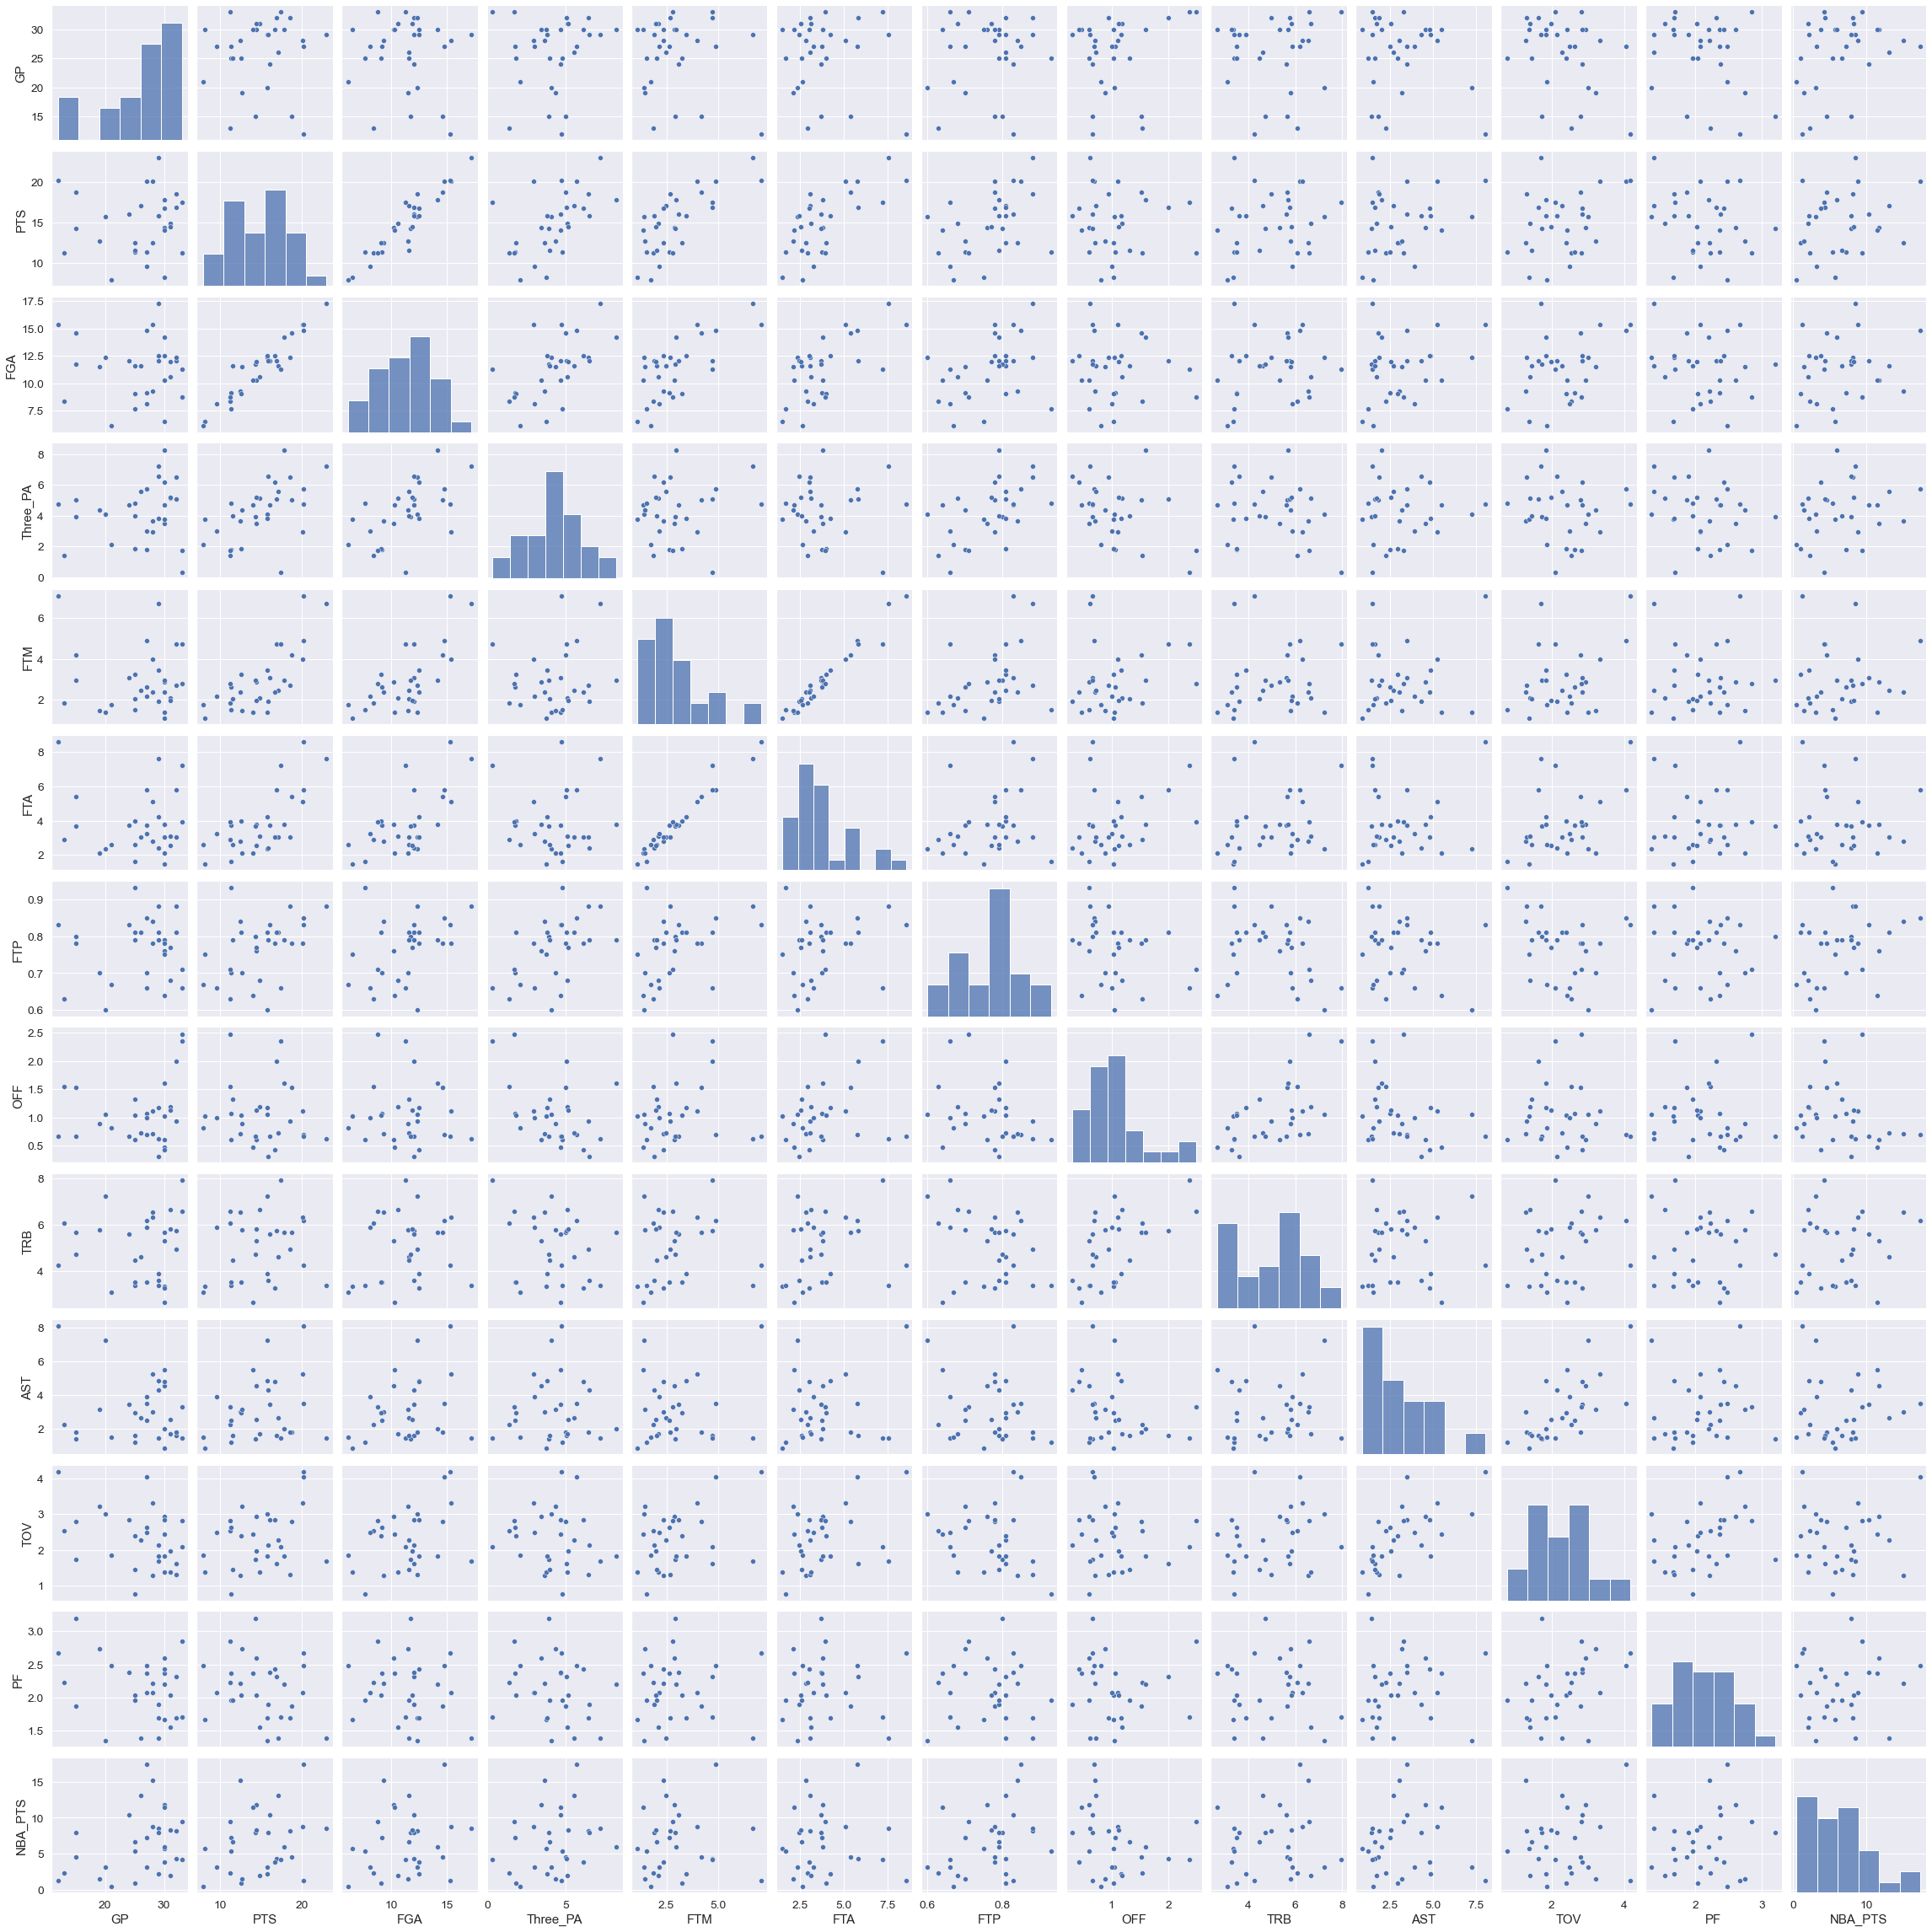

In [117]:
afterRidge = train[['GP','PTS','FGA','Three_PA','FTM','FTA','FTP','OFF','TRB','AST','TOV','PF','NBA_PTS']]
sns.pairplot(afterRidge)

In [142]:
model3 = sm.ols(formula = 'NBA_PTS~GP+PTS+FGA+Three_PA+FTM+FTA+FTP+OFF+TRB+AST+TOV+PF', data=train).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     1.746
Date:                Fri, 03 Mar 2023   Prob (F-statistic):              0.138
Time:                        15:02:43   Log-Likelihood:                -76.673
No. Observations:                  31   AIC:                             179.3
Df Residuals:                      18   BIC:                             198.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7249     18.000     -0.485      0.634     -46.542      29.092
GP             0.3611      0.141      2.557      0.020       0.064       0.658
PTS            0.7069      0.766      0.923      0.368      -0.903       2.317
FGA           -0.2662      0.928     -0.287      0.777      -2.216       1.683
Three_PA      -0.8643      0.800     -1.081      0.294      -2.544       0.816
FTM            6.8053      6.723      1.012      0.325      -7.319      20.930
FTA           -6.4409      5.578     -1.155      0.263     -18.161       5.279
FTP           -2.2040     22.584     -0.098      0.923     -49.651      45.243
OFF           -3.4251      2.287     -1.498      0.152      -8.230       1.380
TRB            1.2206      0.719      1.697      0.107      -0.291       2.732
AST           -0.7443      0.602     -1.236      0.232      -2.009       0.521
TOV            1.5018      1.641      0.915      0.372      -1.947       4.950
PF             2.1302      1.990      1.071      0.299      -2.050       6.311
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.137
Skew:                          -0.081   Prob(JB):                        0.934
Kurtosis:                       2.717   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
preds3 = model3.predict(test)
print('RMSE = ', np.sqrt(((preds3 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(model3.mse_resid))

RMSE =  6.017852458341047 resid. standard error =  3.766704219374495


In [178]:
#Creating a set of predictors from which we need to find the best subset of predictors
X = train[['GP', 'GS', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'Three_Pmade',
       'Three_PA', 'Three_PP', 'FTM', 'FTA', 'FTP', 'OFF', 'DEF', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF']]
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('NBA_PTS~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [179]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [180]:
models_best = forward_selection()

Processed  21 models on 1 predictors in 0.11958909034729004 seconds.
Processed  20 models on 2 predictors in 0.10943484306335449 seconds.
Processed  19 models on 3 predictors in 0.1218569278717041 seconds.
Processed  18 models on 4 predictors in 0.1270129680633545 seconds.
Processed  17 models on 5 predictors in 0.15616893768310547 seconds.
Processed  16 models on 6 predictors in 0.14877009391784668 seconds.
Processed  15 models on 7 predictors in 0.14531683921813965 seconds.
Processed  14 models on 8 predictors in 0.14289307594299316 seconds.
Processed  13 models on 9 predictors in 0.1506481170654297 seconds.
Processed  12 models on 10 predictors in 0.14130473136901855 seconds.
Processed  11 models on 11 predictors in 0.16199183464050293 seconds.
Processed  10 models on 12 predictors in 0.15379810333251953 seconds.
Processed  9 models on 13 predictors in 0.14480805397033691 seconds.
Processed  8 models on 14 predictors in 0.12038707733154297 seconds.
Processed  7 models on 15 predicto

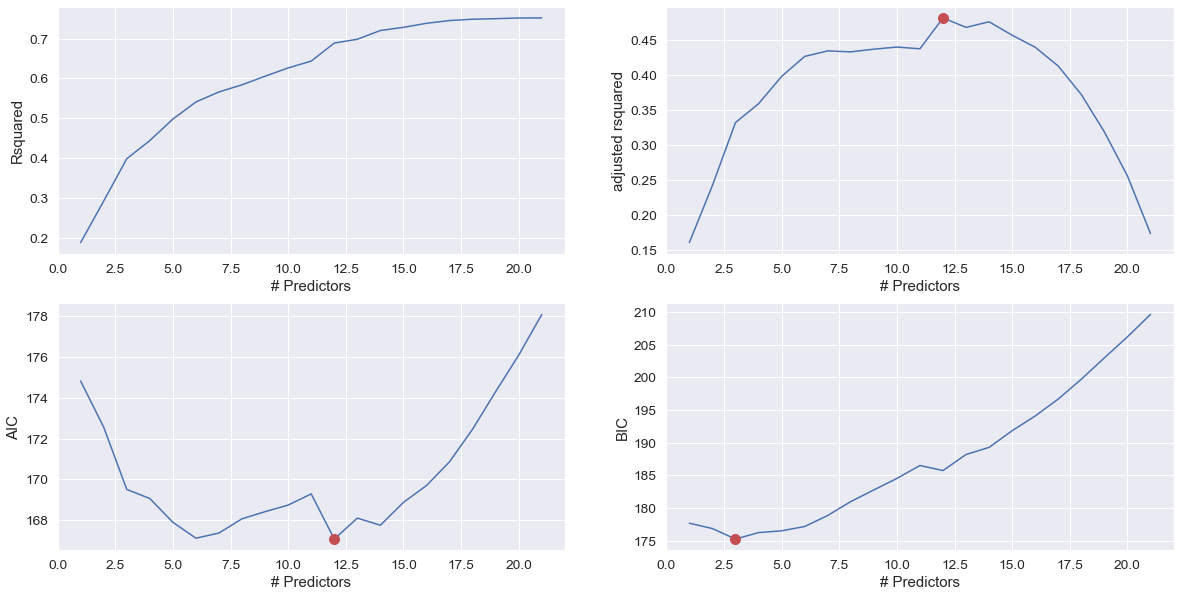

In [181]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [189]:
best_fwd_reg_model = models_best['model'][12]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NBA_PTS   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3.320
Date:                Sat, 04 Mar 2023   Prob (F-statistic):             0.0108
Time:                        16:55:09   Log-Likelihood:                -70.544
No. Observations:                  31   AIC:                             167.1
Df Residuals:                      18   BIC:                             185.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -25.1311      9.068     -2.771      0.013     -44.183      -6.079
GS              0.4274      0.118      3.636      0.002       0.180       0.674
OFF            -4.3519      1.786     -2.437      0.025      -8.104      -0.599
BLK             4.3527      2.476      1.758      0.096      -0.849       9.555
FTP            16.7223     10.021      1.669      0.112      -4.331      37.775
TOV             2.7456      1.281      2.144      0.046       0.055       5.436
AST            -0.9501      0.530     -1.794      0.090      -2.063       0.163
FGP            15.1458      8.288      1.828      0.084      -2.266      32.557
TRB             0.6107      0.608      1.004      0.329      -0.668       1.889
STL             1.3310      2.095      0.635      0.533      -3.070       5.732
Three_Pmade    -7.6044      3.766     -2.019      0.059     -15.518       0.309
Three_PA        2.8097      1.614      1.741      0.099      -0.580       6.200
FTA            -0.9545      0.590     -1.617      0.123      -2.195       0.285
==============================================================================
Omnibus:                        3.738   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.265
Skew:                          -0.565   Prob(JB):                        0.322
Kurtosis:                       3.691   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
preds4 = best_fwd_reg_model.predict(test)
print('RMSE = ', np.sqrt(((preds4 - actuals)**2).mean()),'resid. standard error = ',np.sqrt(best_fwd_reg_model.mse_resid))

RMSE =  7.19477501108635 resid. standard error =  3.0909466187177013
